 <h1><center>Unsupervised Machine Learning Final Project</center></h1>

### Project problem: 
With the holidays coming up it is important for companies to target the right customers using campaigns and deals to draw in customers that are more likely to respond to them. Through machine learning we can analyze groups more likely to respond to campaigns or use discounts, then analyze the demographics of those groups to target the right customers. 

For this project we will use a [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) found on Kaggle. Using this dataset we will seek to understand what behaviours and personality traits best align with a companies goals. The dataset includes the following attributes:

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


## Exploratory Data Analysis

In [27]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [87]:
#Load the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

### Data Cleaning

In [88]:
#Clean up the column names for readability
rename_columns = {
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold'
}
df.rename(columns=rename_columns, inplace=True)

In [89]:
#Take a look at the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweet                2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [90]:
#Check for null values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweet                   0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [91]:
#Eliminate rows where income is null to clean the data
df = df[df['Income'].notna()]

### Visualizations

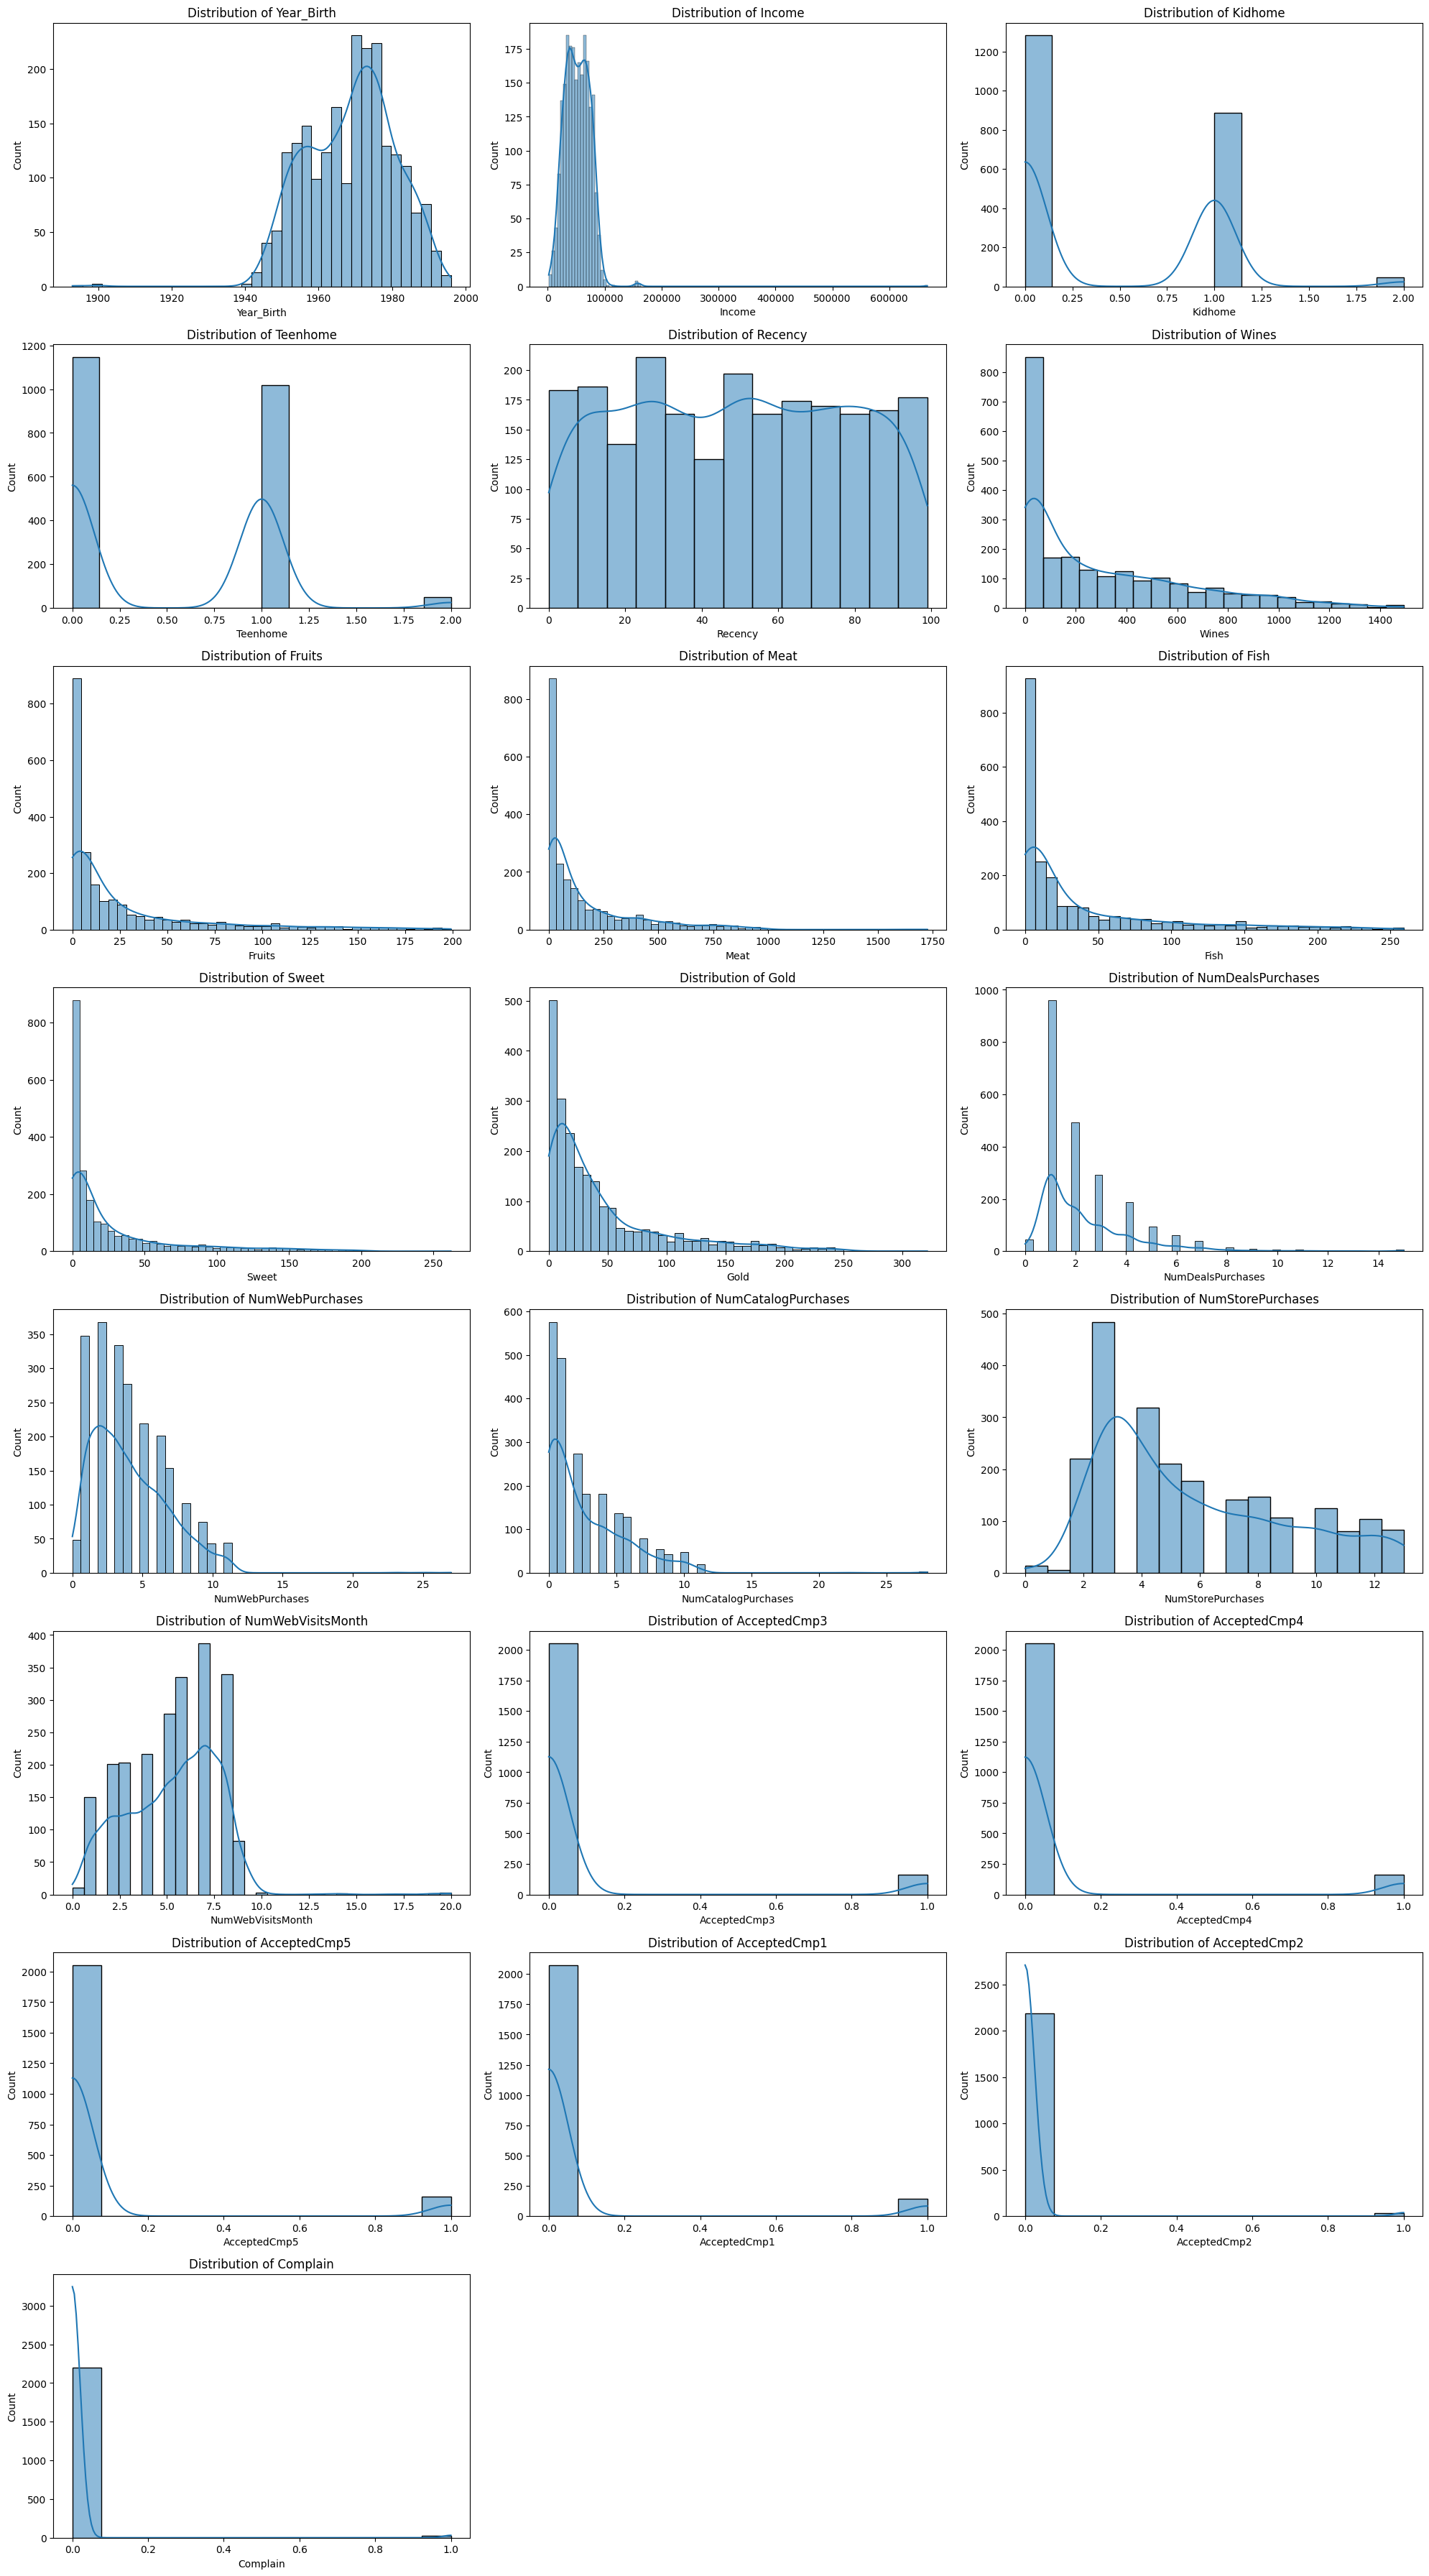

In [92]:
#Plotting distributions for numerical features
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                      'Wines', 'Fruits', 'Meat', 'Fish',
                      'Sweet', 'Gold', 'NumDealsPurchases',
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                      'Complain']

plt.figure(figsize=(20, 40))
for i, feature in enumerate(numerical_features):
    plt.subplot(9, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Based on these visualizations it looks like there are some outliers in birth year and income. Let's adjust.

In [93]:
#Remove outliers: Year_Birth < 1920 and Income > 200000
df = df[(df['Year_Birth'] >= 1920) & (df['Income'] <= 200000)]


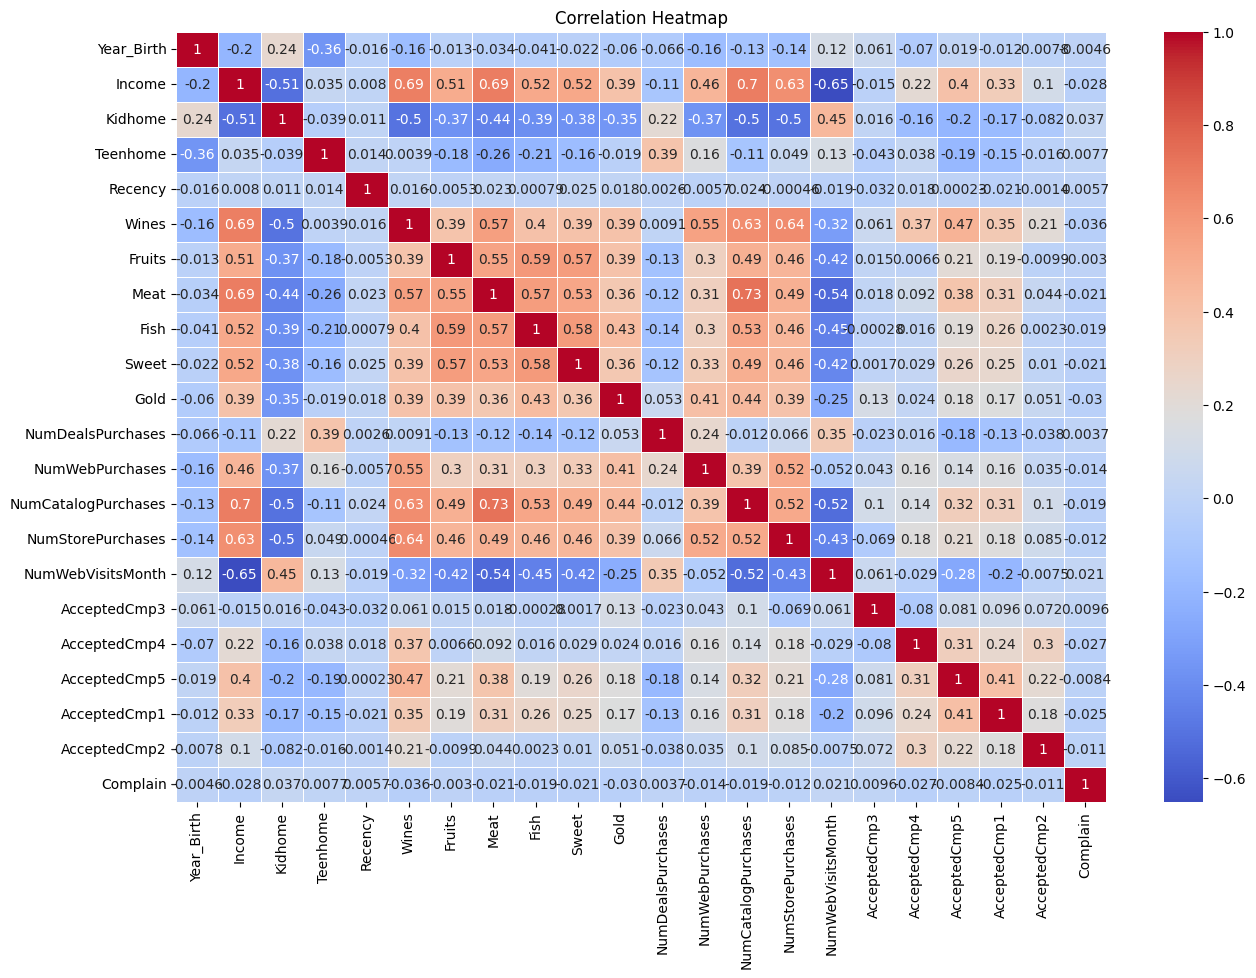

In [94]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap is a useful tool to visualize the correlation between the different columns. For instance, you can immediately see that Number of Catalog Purchase and Meat spending are correlated, meaning there may be more offers on meat items in catalogs. You can alsp see that Number of Web Visits is negatively correlated with income, meaning that potentially higher income individuals tend to shop in store. 

/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3411704810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3411704810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


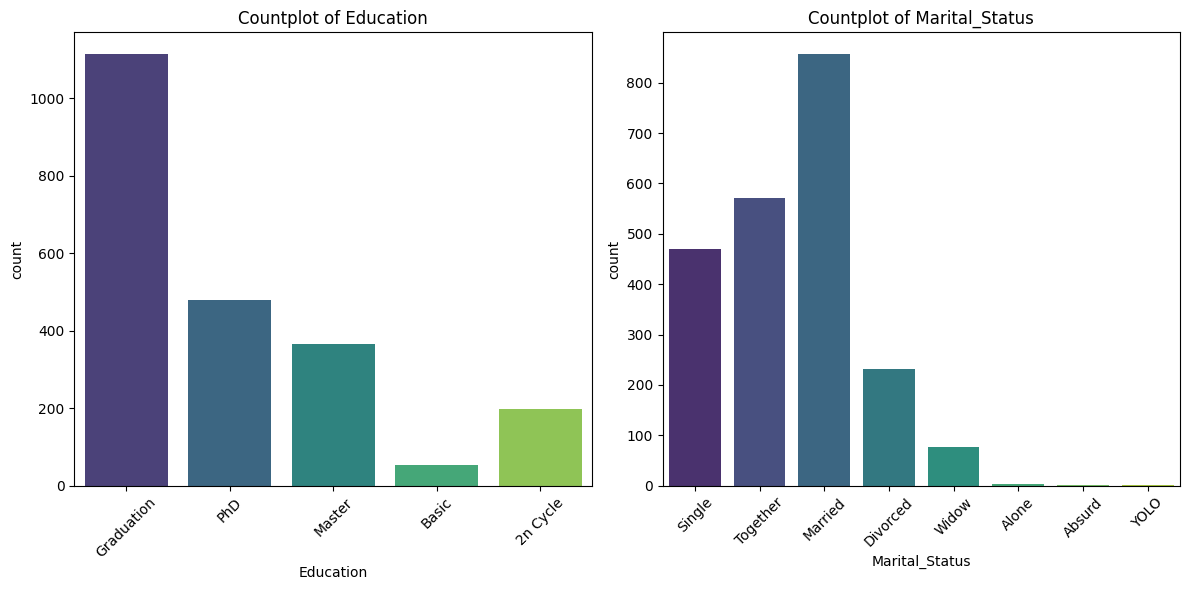

In [95]:
# Checking the distribution of categorical features
categorical_features = ['Education', 'Marital_Status']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here you can see that most individuals tend to have above a basic level of education with most in Graduation category. Individuals also tend to be married or in a relationship. However, there are some unneeded (and absurd) categories. Let's eliminate them.

In [96]:
#Update Marital_Status values and remove unwanted categories
#Change alone to single
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})
#Remove rows where status is Absurd or Yolo
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]
#Change 2n Cycle to Master in Educaion
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3870226990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3870226990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


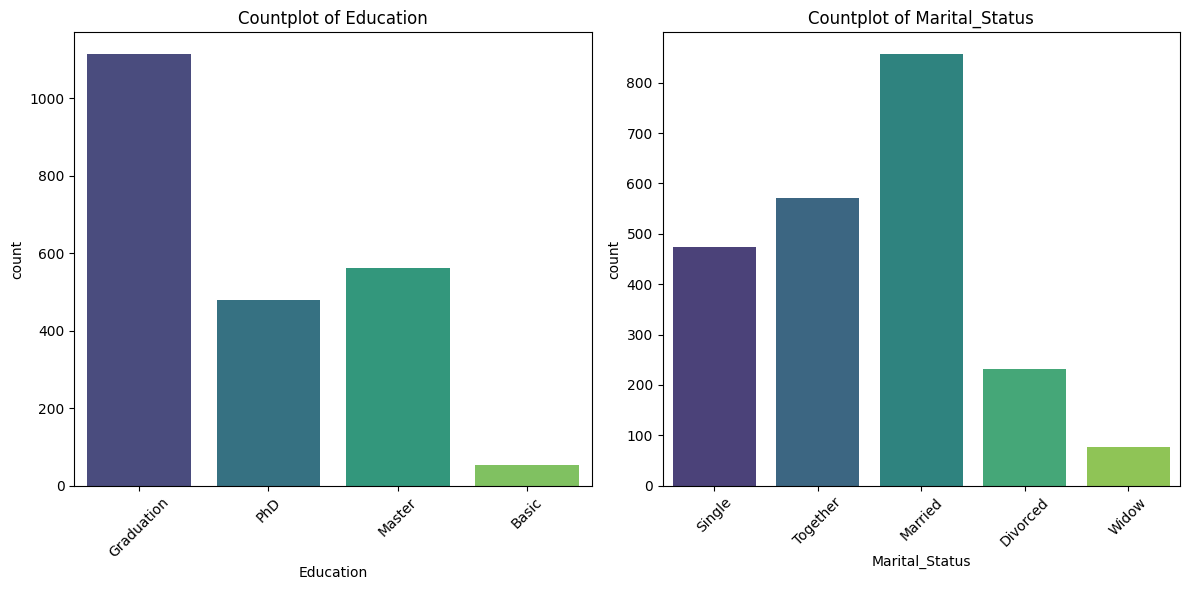

In [97]:
#Re-plot
categorical_features = ['Education', 'Marital_Status']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The categories are looking much cleaner. Now we will convert these categories into a numeric variable to be used in machine learning

In [98]:
#Convert Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Single': 1,
    'Married': 2,
    'Together': 2,
    'Divorced': 3,
    'Widow': 3
})

#Convert education
df['Education'] = df['Education'].replace({
    'Basic': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4,
})

print(df.head())

     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               1  58138.0        0         0   
1  2174        1954          2               1  46344.0        1         1   
2  4141        1965          2               2  71613.0        0         0   
3  6182        1984          2               2  26646.0        1         0   
4  5324        1981          4               2  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58    635  ...                  7             0   
1  08-03-2014       38     11  ...                  5             0   
2  21-08-2013       26    426  ...                  4             0   
3  10-02-2014       26     11  ...                  6             0   
4  19-01-2014       94    173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0    

In [99]:
#Drop Dt_Customer column to clean up data since we will not be using it
df.drop(columns=['Dt_Customer'], inplace=True)

## Principal Component Analysis
Now we will move into the models. We will first do PCA to reduce the dimensionality of the data which makes it more manageable to work with. This will keep the important characteristics and ignore the noise. This will also improve the performance of the agglomerative clustering we will do next.

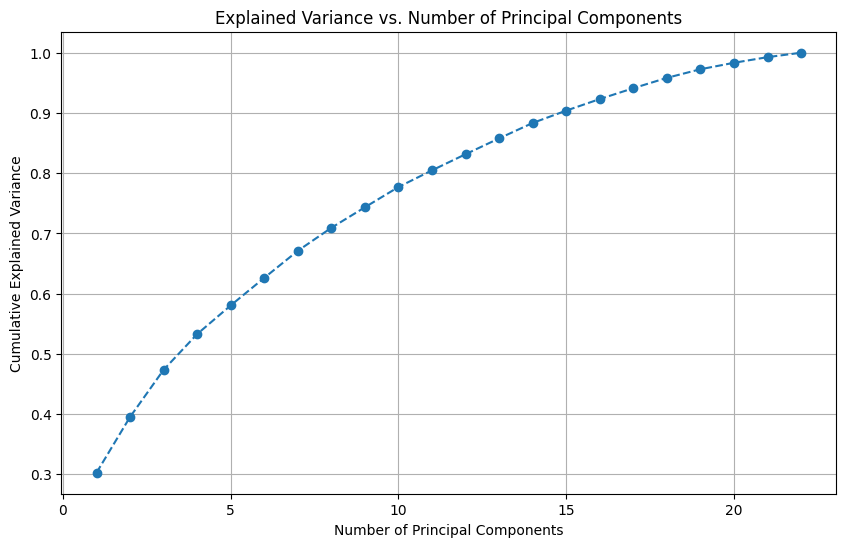

In [100]:
# Selecting features for PCA
features_for_pca = df[numerical_features].dropna()

#Standarde
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)

#Fit
pca = PCA()
pca.fit(scaled_features)

#plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()



Based off this plot we want to choose a number of principal components that captures most of the variance while reducing dimensionality. We want to capture 80-90% of the variance and this happens between 10-15, so we will choose 12 for a good balance. 

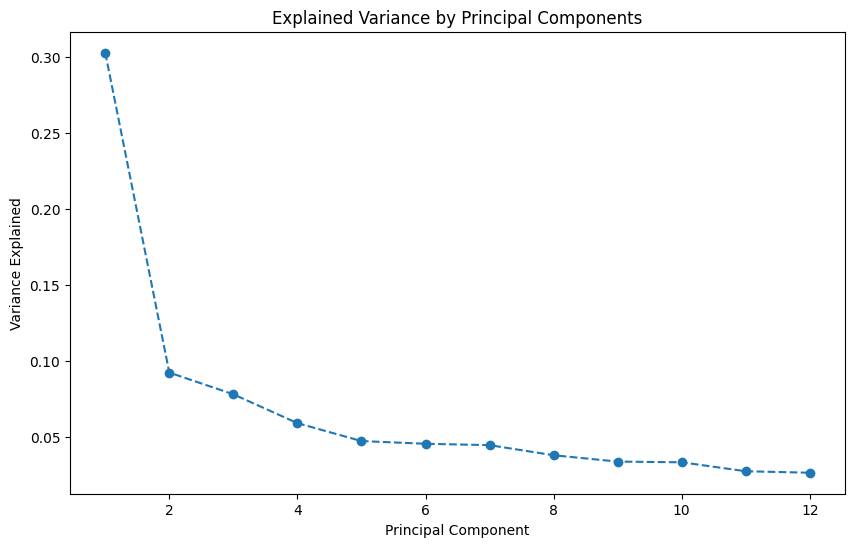

In [101]:
#Apply PCA
pca = PCA(n_components=12)  #with our chosen number of components
principal_components = pca.fit_transform(scaled_features)

#create the dataframe
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

#Visualize
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

The first principal component (PC1) explains approximately 30% of the total variance in the dataset. The second principal component (PC2) explains around 10% of the variance. The third and subsequent components capture progressively less variance, each explaining about 5-10% or less. Then it quickly drops even lower. 
 
The graph shows a classic elbow shape, where the initial components explain a large portion of the variance, but additional components contribute less and less. There is diminishing return after 4-5 principal components. Based on this, we will use 4 components to capture most of the variance while lowering dimensionality. 

In [102]:
#PCA with 4 components
#Standardize again
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

#Apply PCA
pca = PCA(n_components=4) #new chosen # of components
principal_components = pca.fit_transform(scaled_features)

#Dataframe
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

df_pca = pd.concat([df.reset_index(drop=True), pca_df], axis=1)



### Agglomerative clustering
Now we will use agglomerative clustering to provide a hierarchical representation of the data. This, with PCA, will allow us to explore customer groups and notice how customer demographics may be groups with behaviours.

/Users/adrienne/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


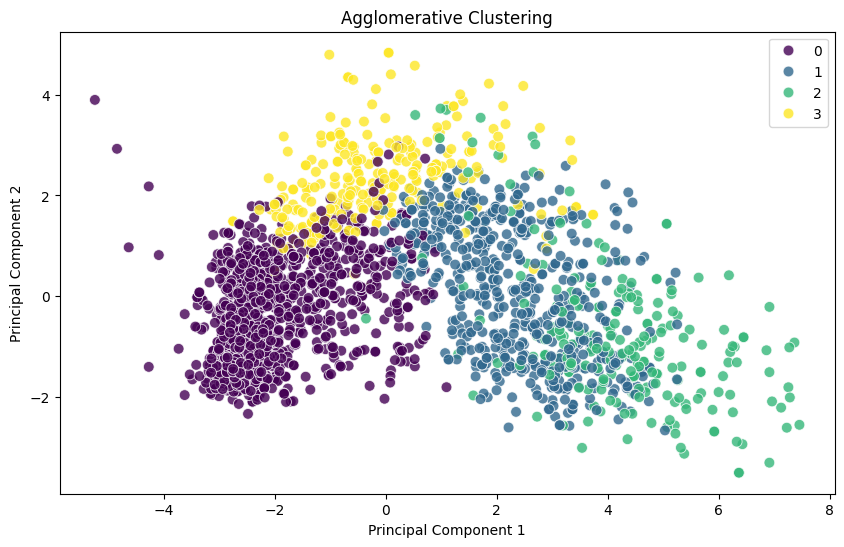

In [159]:
#Applying agglomerative clustering
clusters = agg_cluster.fit_predict(pca_df)

df_pca['Cluster'] = clusters

#Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Results & Evaluation

In [160]:
#Summary statistics of clusters
cluster_summary = df_pca.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

#Count the number of customers in each cluster
cluster_counts = df_pca['Cluster'].value_counts()
print("\nCluster Counts:\n", cluster_counts)


Cluster Summary:
                   ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5614.240741  1971.365079   2.613757        1.895062  36712.118166   
1        5783.029110  1966.207192   2.703767        1.936644  69379.688356   
2        5472.047210  1969.098712   2.673820        1.918455  80268.931330   
3        5104.369650  1964.000000   2.778210        2.035019  53849.622568   

          Kidhome  Teenhome    Recency       Wines     Fruits  ...  Complain  \
Cluster                                                        ...             
0        0.720459  0.466490  48.705467   65.652557   6.945326  ...  0.010582   
1        0.058219  0.488014  49.883562  511.106164  57.929795  ...  0.010274   
2        0.042918  0.128755  49.004292  815.201717  54.639485  ...  0.004292   
3        0.451362  1.062257  48.782101  432.151751  14.116732  ...  0.003891   

         Z_CostContact  Z_Revenu

### Visualizations

/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3376195937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_pca, palette='viridis')


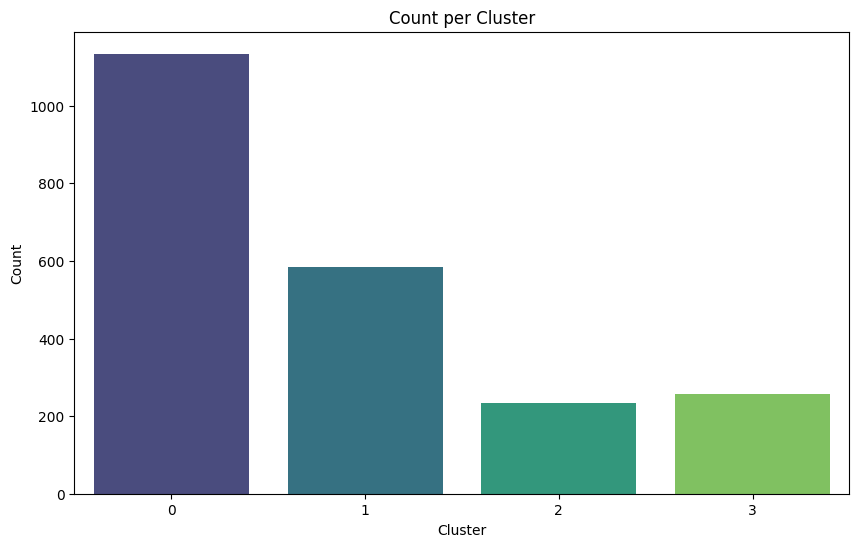

In [161]:
#Boxplot to visualize count per cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_pca, palette='viridis')
plt.title('Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


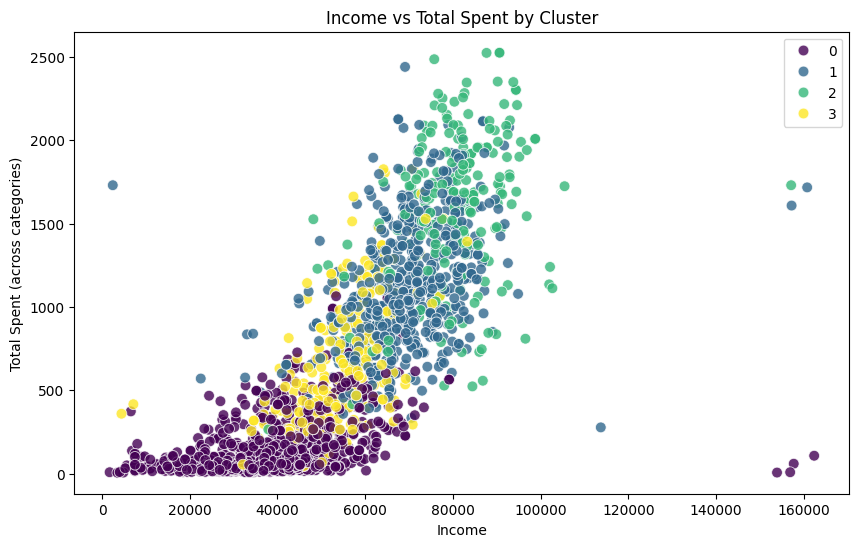

In [162]:
#scatter plot with Income and total spending across categories
df_pca['Total_Spent'] = df_pca['Wines'] + df_pca['Sweet'] + df_pca['Meat'] + df_pca['Fish'] + df_pca['Fruits'] + df_pca['Gold']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spent', hue='Cluster', data=df_pca, palette='viridis', s=60, alpha=0.8)
plt.title('Income vs Total Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Total Spent (across categories)')
plt.legend()
plt.show()


This plot shows that the clustering is correlated with the income and spenditure of the individuals. Group 0 shows low to mid range income and lowe spending, group 3 shows mid range income with mid range spending, and groupd 1 and 2 show mid to high range income with higher spending (group 2 being highest income and highest spending). The count by cluster is higher for group 0, meaning there may be the most data points for individuals with low to mid range incomes that have lower spending tendencies. 

##### Now let's look at spending on individual groups by cluster

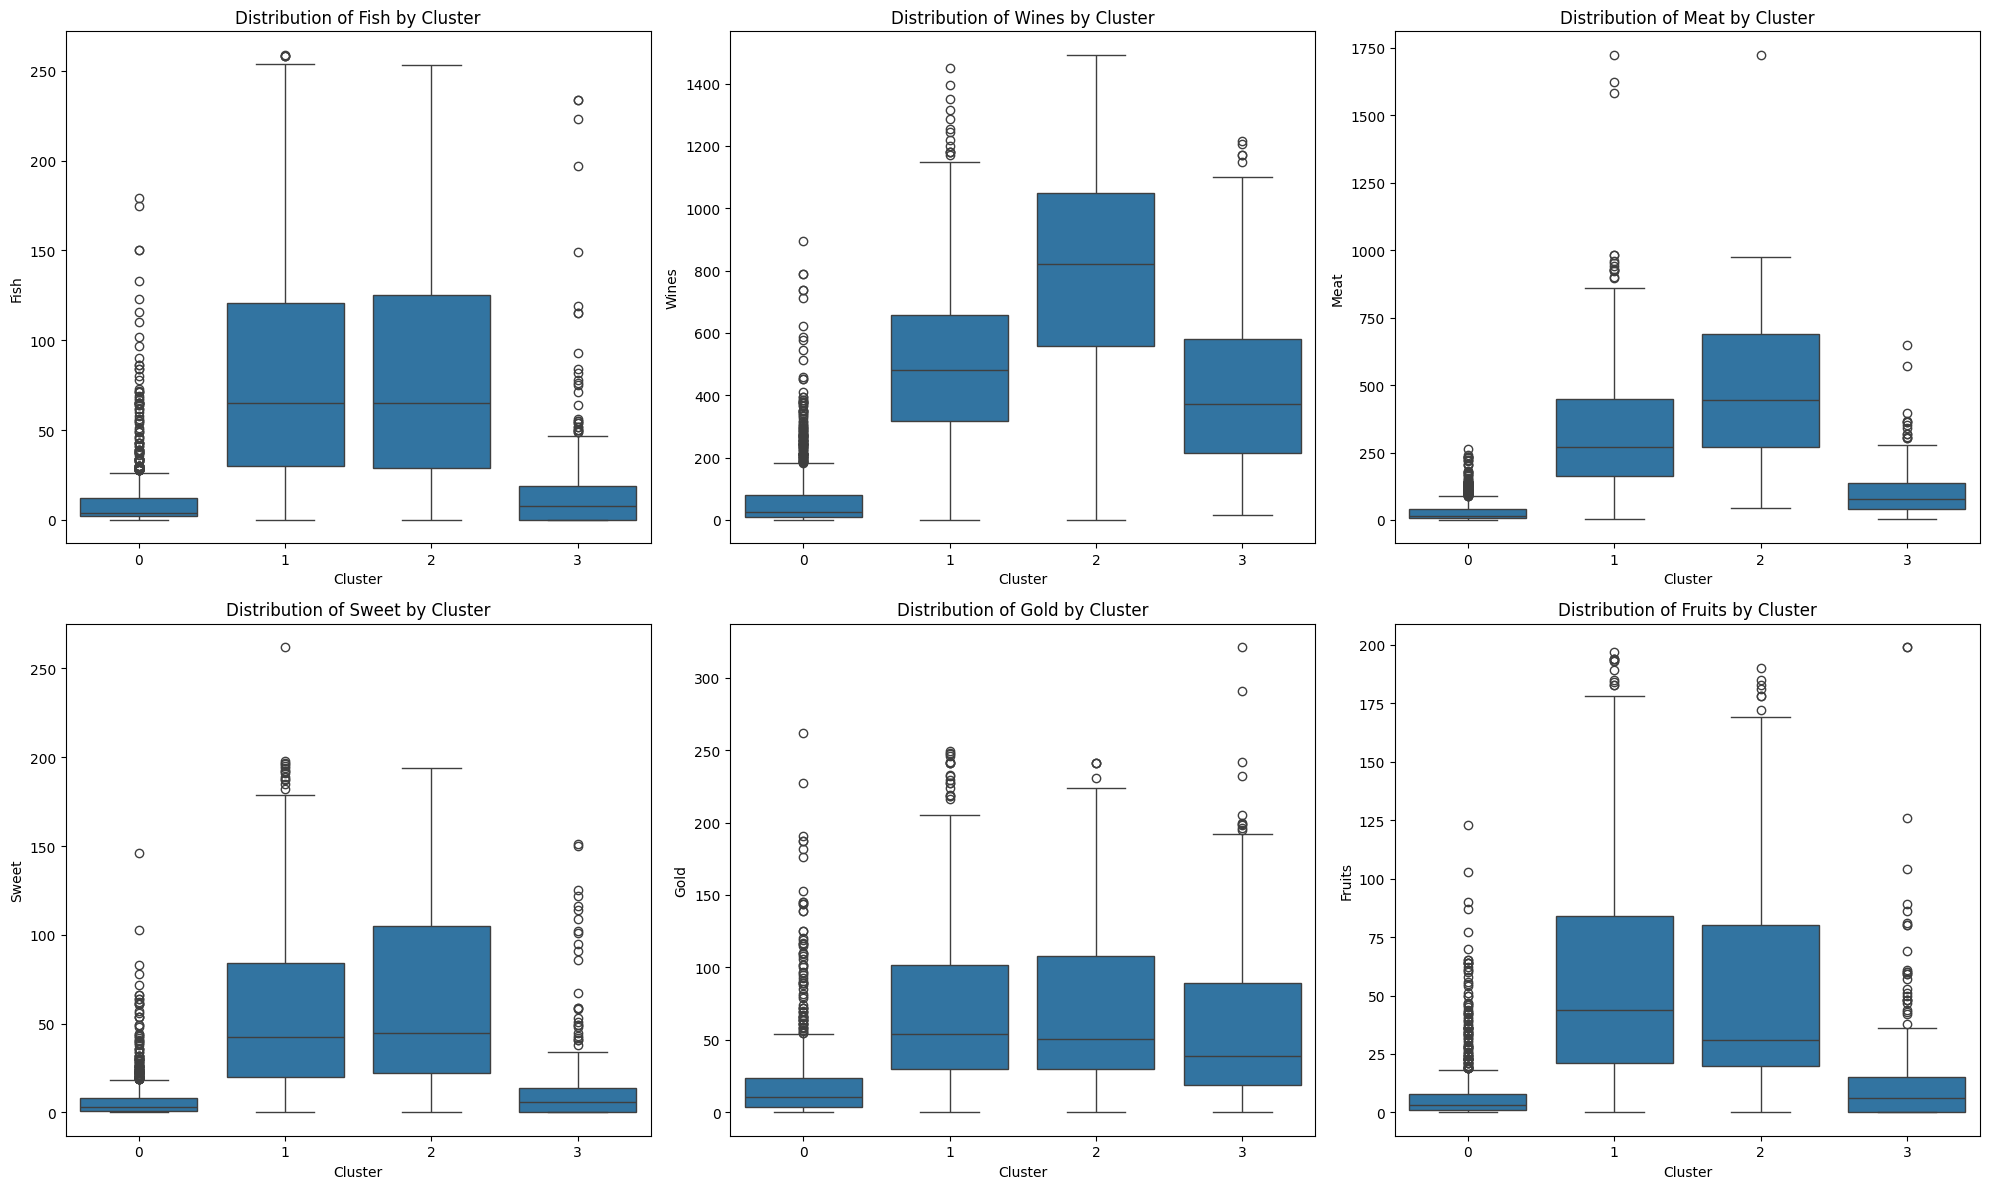

In [122]:
# Plot feature distributions within each cluster for selected features next to each other
selected_features = ['Fish', 'Wines', 'Meat', 'Sweet', 'Gold', 'Fruits']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df_pca)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


As expected you can see that groups 1 and 2 have higher spending on the various categories. Group 3 tends to have higher spending than group 0. Interestingly, group 3 spends a similar amount on wine to groups 1 & 2. 

First we'll look at where they are spending their money, then what promotions they respond to the most.

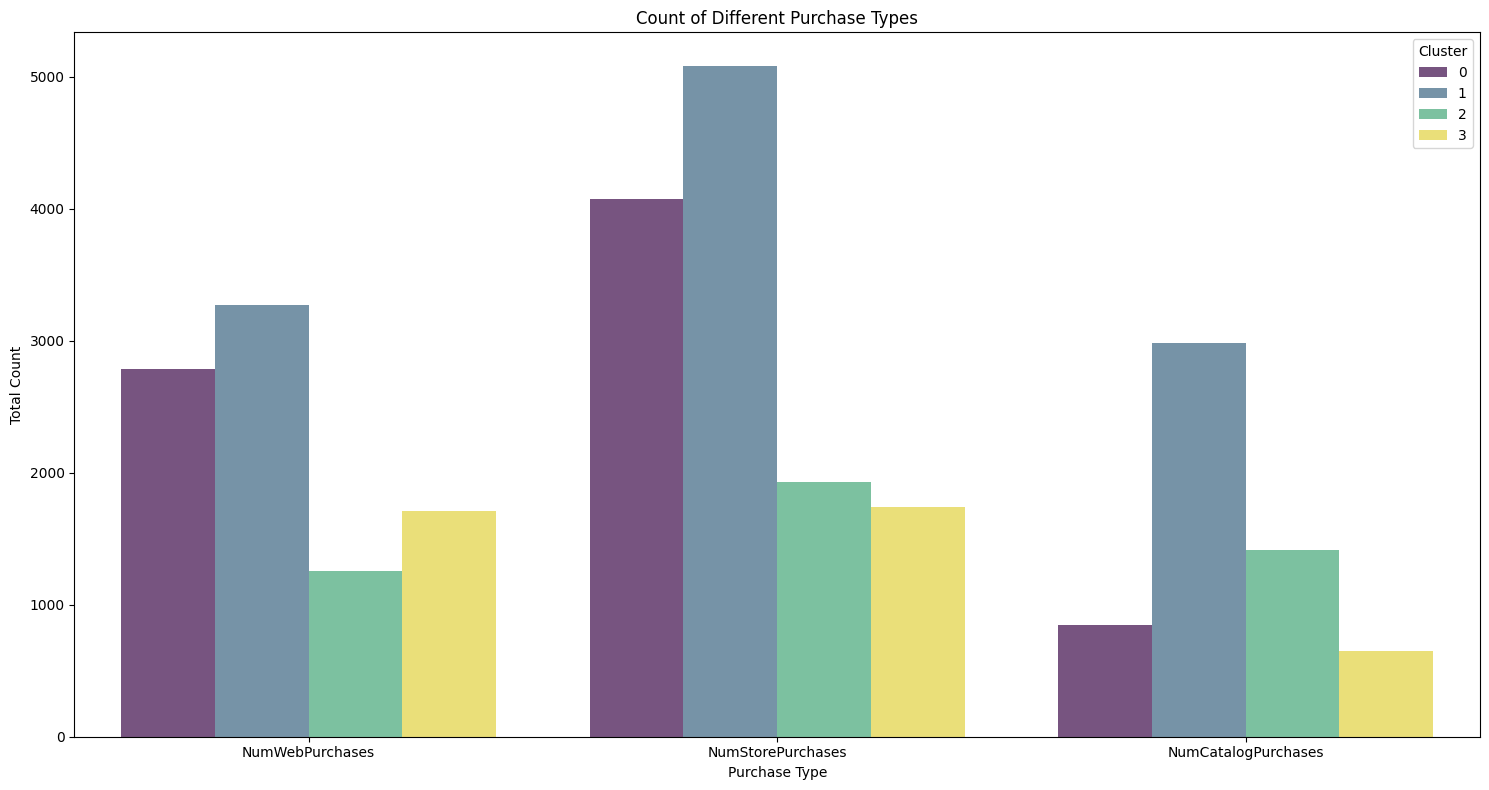

In [164]:
#Plot where they are spending money
cluster_subset = df_pca[df_pca['Cluster'].isin([0, 1, 2, 3])]

melted_df = cluster_subset.melt(id_vars=['Cluster'], 
                                value_vars=['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases'], 
                                var_name='Purchase_Type', value_name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='Purchase_Type', y='Count', hue='Cluster', data=melted_df, palette='viridis', errorbar=None, estimator=sum, alpha=0.7)

plt.title('Count of Different Purchase Types')
plt.xlabel('Purchase Type')
plt.ylabel('Total Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



Across the board each cluster is showing highest count for in store purchases. Group 2 has higher numbers of catalog purchases versus web, whereas groups 0, 1, & 3 have more web than catalog purchases

Now let's look at what promotions and deals they responded to.


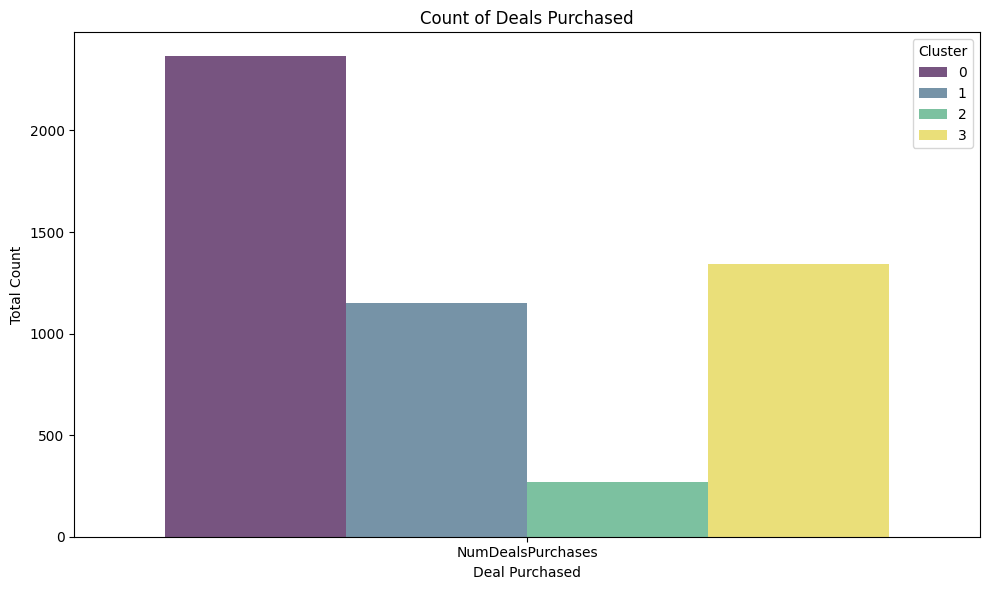

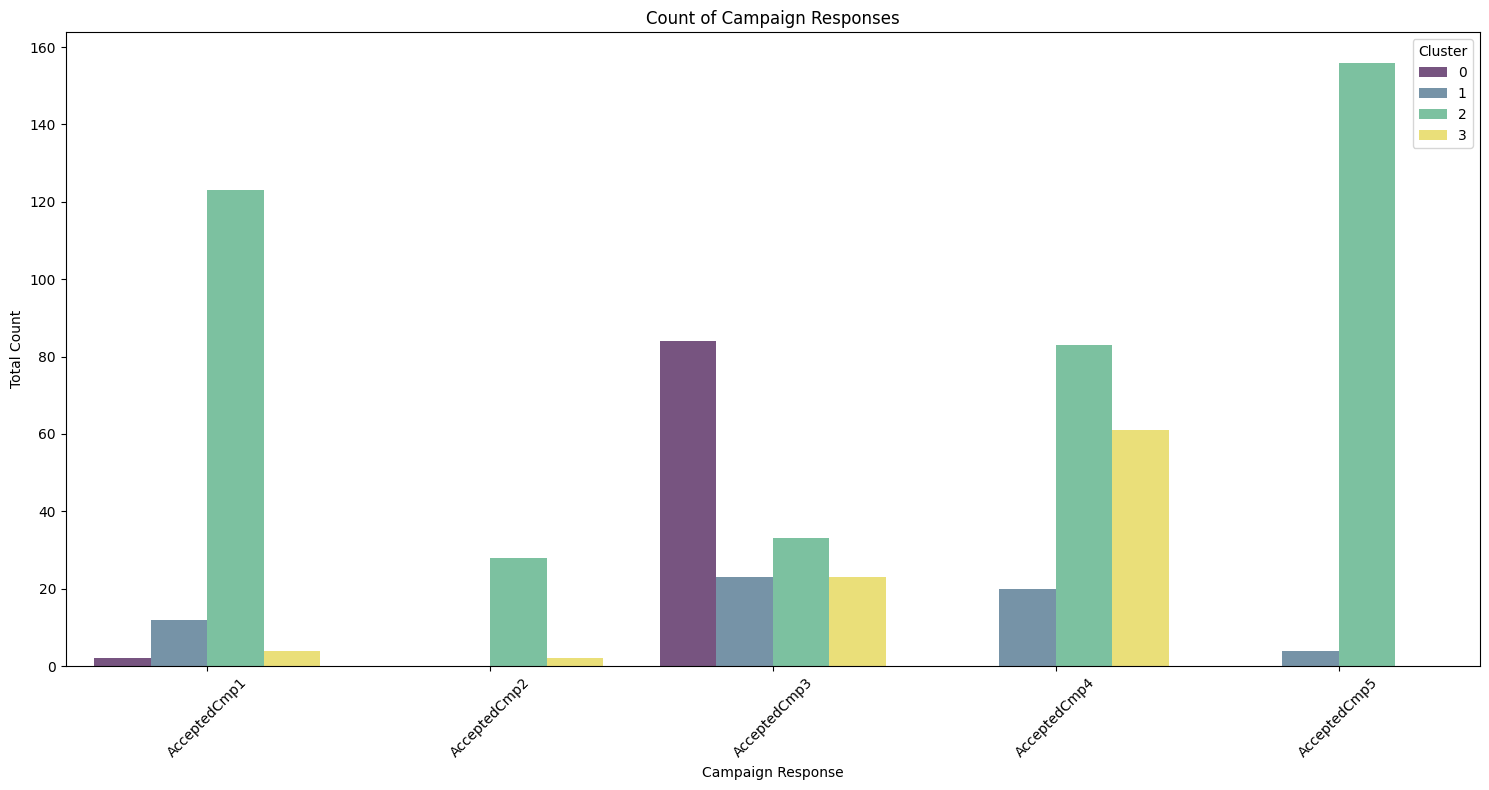

In [148]:
#Plot for deals purchased
deals_features = ['NumDealsPurchases']

melted_deals_df = cluster_subset.melt(id_vars=['Cluster'], 
                                      value_vars=deals_features, 
                                      var_name='Deal_Response', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Deal_Response', y='Count', hue='Cluster', data=melted_deals_df, palette='viridis', errorbar=None, estimator=sum, alpha=0.7)

plt.title('Count of Deals Purchased')
plt.xlabel('Deal Purchased')
plt.ylabel('Total Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#Plot for campaign responses
campaign_features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

melted_campaign_df = cluster_subset.melt(id_vars=['Cluster'], 
                                         value_vars=campaign_features, 
                                         var_name='Campaign_Response', value_name='Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='Campaign_Response', y='Count', hue='Cluster', data=melted_campaign_df, palette='viridis', errorbar=None, estimator=sum, alpha=0.7)

plt.title('Count of Campaign Responses')
plt.xlabel('Campaign Response')
plt.ylabel('Total Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is clear that clusters 0, 1, and 3 are more likely to purchase deals with a discount. Group 2 has a very low count for purchasing deals with a discount.

Looking at the count of campaign responses however, cluster group 2 is most likely to repeatedly accept the campign deal.

Now let's do some profiling to see what demographics make up each group and see if we can create a targeted campaign. 

In [150]:
#Let's combine the kid and teen at home categories to get a total number of kids in the household
df_pca['Kid_Teen_Home'] = df_pca['Kidhome'] + df_pca['Teenhome']

/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3046666095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Year_Birth', data=cluster_demographics, palette='viridis')
/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3046666095.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Kid_Teen_Home', data=cluster_demographics, palette='viridis')
/var/folders/kl/8nm_b54n7917k8b6071ds8500000gn/T/ipykernel_50387/3046666095.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clust

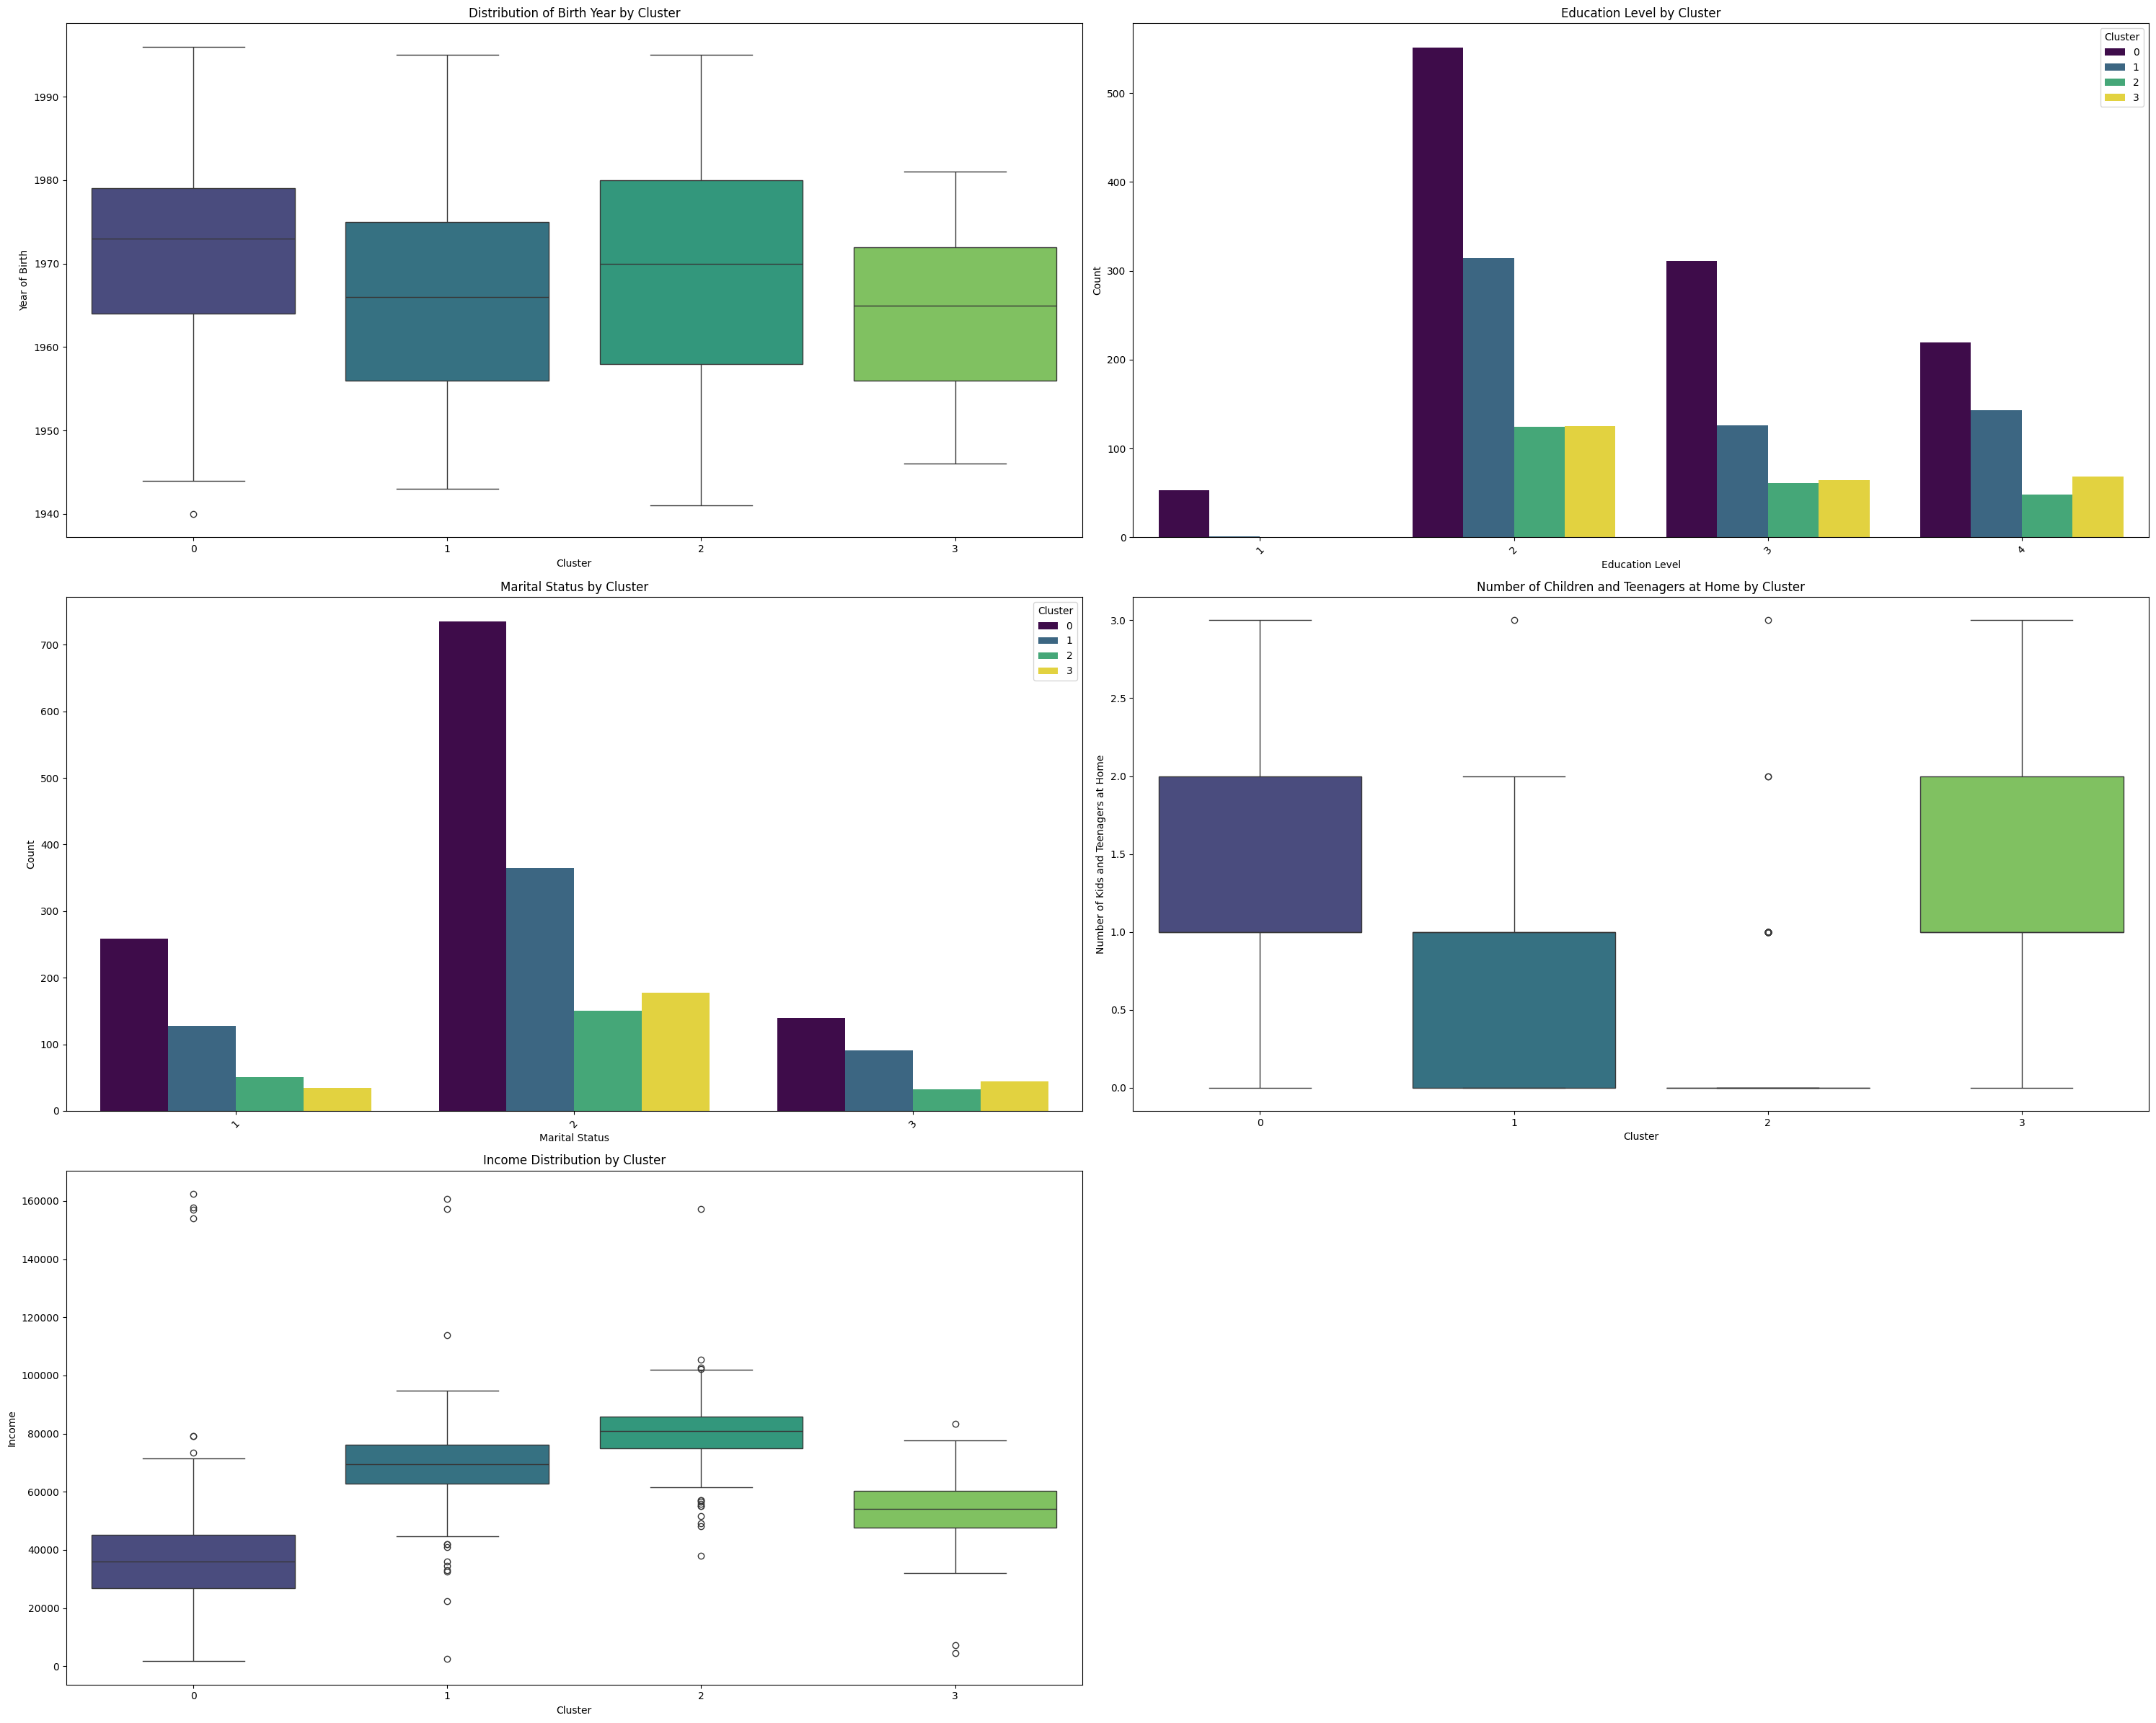

In [154]:
#Creating a subset of demographics features
cluster_demographics = df_pca[['Cluster', 'Year_Birth', 'Education', 'Marital_Status', 'Kid_Teen_Home', 'Income']]

#Plot all demographic features by group
plt.figure(figsize=(30, 24))

#Birth year
plt.subplot(3, 2, 1)
sns.boxplot(x='Cluster', y='Year_Birth', data=cluster_demographics, palette='viridis')
plt.title('Distribution of Birth Year by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Year of Birth')

#education
plt.subplot(3, 2, 2)
sns.countplot(x='Education', hue='Cluster', data=cluster_demographics, palette='viridis')
plt.title('Education Level by Cluster')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)

#Marital status
plt.subplot(3, 2, 3)
sns.countplot(x='Marital_Status', hue='Cluster', data=cluster_demographics, palette='viridis')
plt.title('Marital Status by Cluster')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)

#Kids
plt.subplot(3, 2, 4)
sns.boxplot(x='Cluster', y='Kid_Teen_Home', data=cluster_demographics, palette='viridis')
plt.title('Number of Children and Teenagers at Home by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Kids and Teenagers at Home')

#Income
plt.subplot(3, 2, 5)
sns.boxplot(x='Cluster', y='Income', data=cluster_demographics, palette='viridis')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

plt.tight_layout()
plt.show()


#### Demographic Analysis:

The age (base on Year of Birth) seems to be fairly even across the clusters, with cluster group 3 showing the youngest grouping and group 0 showing the smallest range in an older group. Education level has fairly even distribution among the groups but only cluster 1 shows a high count with "Basic" education

Marital status and kids show some interesting trends. All groups show the most consumers in a married/together status, however group 2 has the lowest distribution within married/together. Furthermore, groups 0 and 3 tend to have the highest number of kids with average 1-2 kids, group 1 has 0-1 kids, and group 2 tends to have no children. 

Lastly, as we saw before, groups 1 and 2 have higher incomes, followed by group 3, and group 0 last. 


#### What does this mean?

Based on the above information we can create groups.

Cluster group 0: Lower income older individuals, typically married or in a relationship with 1-2 kids at home. Likely basic education or above.

Cluster group 1: Mid to higher income individuals of younger to middle age, typically married or in a relationship with 0-1 kids at home. Has above basic education or above.

Cluster group 2: Higher income individuals of mid to older age, typically married or in a relationship (with a higher chance of being single) with no kids at home. Has above basic education and often Masters or PhD level.

Cluster group 3: Mid level income individuals of middle age, typically married or in a relationship (with a higher chance of being widowed/divorced) with 1-2 kids at home. 

#### Putting the pieces together:

Since groups 1 and 2 show higher spending, that means that individuals with fewer or no children tend to spend more. Group 2 has the highest spending showing that higher income individuals falling into the category of no children tend to spend the most. 

Group 2 was also most likely to respond to campaigns but least likely to spend on deals with discounts. Discounts were more often utilized by group 0, then 1 & 3, showing that low to mid level income individuals are more likely to look for discounts but less likely to respond to cap